In [1]:
import pandas as pd
from collections import Counter
import datetime
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
data1_in = pd.read_csv('../Data/data1/data1.csv')
data2_in = pd.read_csv('../Data/data2/data2.csv')
data3_in = pd.read_csv('../Data/data3/data3.csv')

In [3]:
def visualData(data, colName):
    plt.figure()
    x = data['label'].groupby(data[colName]).mean().index
    y = data['label'].groupby(data[colName]).mean().get_values()
    m = data['label'].groupby(data[colName]).mean().median()
    plt.plot(x,y)
    plt.hlines(m,x.min(),x.max())

In [ ]:
# deal device_type
plt.plot(list(Counter(a).keys())[2:-7], list(Counter(a).values())[2:-7])
def mapDeviceType():
    con_data = pd.concat([data1_in, data2_in])
    index = con_data['label'].groupby(con_data["device_type"]).mean().index
    values = con_data['label'].groupby(con_data["device_type"]).mean().get_values()
    return index[values>0.5]

In [4]:
data1_in.columns

Index(['user_id', 'register_day', 'register_type', 'device_type',
       'login_day_max', 'login_day_min', 'login_day_std', 'login_cnt',
       'login_sum', 'login_max', 'login_arg', 'login_last_cnt',
       'login_week_cnt', 'login_week_arg_cnt', 'video_day_max',
       'video_day_min', 'video_day_std', 'video_cnt', 'video_sum', 'video_max',
       'video_arg', 'video_last_cnt', 'video_week_cnt', 'video_week_arg_cnt',
       'act_day_max', 'act_day_min', 'act_day_std', 'act_cnt', 'act_sum',
       'act_max', 'act_arg', 'act_last_cnt', 'act_week_cnt',
       'act_week_arg_cnt', 'page_0', 'page_1', 'page_2', 'page_3', 'page_4',
       'action_type_0', 'action_type_1', 'action_type_2', 'action_type_3',
       'action_type_4', 'action_type_5', 'is_author', 'label'],
      dtype='object')

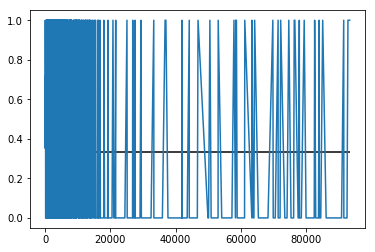

In [9]:
visualData(data2_in, 'device_type')

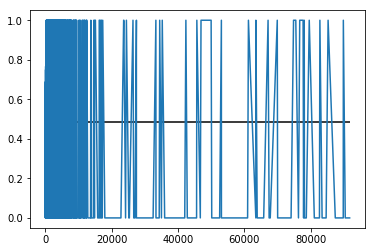

In [10]:
visualData(data1_in, 'device_type')

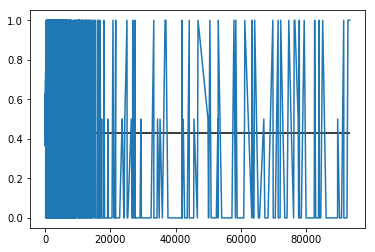

In [11]:
visualData(pd.concat([data1_in, data2_in]), 'device_type')

In [ ]:
def registertypeMap(value):
    if value < 2 or value==6 or value == 9:
        return 2
    elif value == 3 or value == 5

def fenduanData(data):
    data['register_type_fenduan'] = data['register_type'].apply(lambda x:)

In [7]:
set(data1_in['register_type'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [18]:
data2_in[data2_in.register_type == 2].shape[0]

6000

In [12]:
Counter(data2_in['device_type'])

Counter({283: 17,
         259: 20,
         2: 1224,
         23: 294,
         0: 1777,
         650: 4,
         593: 9,
         403: 13,
         135: 43,
         9: 520,
         10: 886,
         7: 921,
         145: 46,
         214: 31,
         24: 280,
         96: 62,
         55: 117,
         21: 286,
         113: 52,
         1359: 1,
         46: 129,
         8: 891,
         17: 361,
         480: 11,
         11: 489,
         50: 130,
         28: 237,
         162: 38,
         41: 159,
         122: 52,
         1040: 5,
         63: 79,
         20: 305,
         353: 15,
         19: 348,
         693: 1,
         31: 203,
         59: 100,
         32: 190,
         1754: 1,
         15: 635,
         196: 44,
         546: 6,
         397: 10,
         465: 14,
         483: 8,
         54: 103,
         2540: 1,
         35: 259,
         1043: 1,
         990: 7,
         22: 303,
         428: 8,
         408: 4,
         256: 20,
         16: 370,
     